## Chapter 14

### 합성곱 층(convolutional layer)

* 첫 번째 합성곱 층의 뉴런은 입력 이미지의 모든 픽셀에 연결되는 것이 아닌, 합성곱 층 뉴런의 수옹장 안에 있는 픽셀에만 연결.
* 두 번째 합성곱 층의 뉴런은 첫번째 층의 작은 사각 영역 안에 위치한 뉴런에 연결.
* 이러한 구조는 네트워크가 첫 번째 은닉층에서는 작은 저수준 특성에 집중하고, 그 다음 은닉층에서는 더 큰 고수준 특성으로 조합해나가도록 도와줌.

* 기존 다층 신경망은 한 줄로 길게 늘어선 뉴런으로 구성되어있었으므로, 입력 이미지를 1차원 배열로 펼처야 했음.
* CNN에서는 각 층이 2차원으로 표현되므로 뉴런을 그에 상응하는 입력과 연결하기 쉬움.

* 합성곱 층의 $i$행 $j$열에 있는 한 뉴런은 이전 층의 $i$에서 $i+f_h-1$까지의 행과, $j$에서 $j+f_w-1$까지의 열에 있는 뉴런의 출력에 연결됨.
  * $f_h, f_w$ : 수용장의 높이와 너비
* 일반적으로 수용장의 높이와 너비를 이전 층과 동일하게 유지하기 위해 입력 주변에 0을 추가하는데, 이를 **제로 패딩(zero padding)** 이라고 함.

* 수용장 사이에 간격을 두어, 큰 입력층을 훨씬 작은 층에 연결하는 것도 가능함. 이는 모델의 계산 복잡도를 크게 낮춰줌.
* 한 수용장과 다른 수용장 사이의 간격을 **스트라이드(stride)** 라고 함.
  * 상위층의 $i$행, $j$열의 뉴런이 이전 층의 $i\times s_h$에서 $i\times s_h+f_h-1$까지의 행과 $j\times s_w+f_w-1$까지의 열에 위치한 뉴런과 연결됨.
  * $s_h, s_w $ :스트라이드의 수직값과 수평값 

* 뉴런의 가중치는 수용장 크기의 작은 이미지로 표현 가능.
  * ex) 필터(filter, 또는 합성곱 커널 convolution kernel)라고 부르는 두 개의 가중치 세트. 첫 번째는 가운데 흰 수직선이 있는 검은 사각형(가운데 열이 1로 채워져 있고 나머지는 0으로 채워진 7\*7 행렬), 두 번째는 가운데 흰 수평선이 있는 검은 사각형.
  * 첫 번째 필터는 가운데의 수직선 부분을 제외하고 수용장에 있는 모든 것을 무시하게 되고, 두 번째 필터는 가운데 수평선 부분을 제외하고는 수용장 안의 모든 것을 무시하게 됨.
  * 첫 번째 필터(와 같은 편향)를 이미지에 적용하면 흰 수직선만 강조되고 나머지는 희미해진 이미지가 나옴.
  * 즉, 층의 뉴런에 적용된 하나의 필터는 하나의 **특성 맵(feature map)** 을 만듦. 특성 맵은 필터를 가장 크게 활성화시키는 이미지의 영역을 강조.
  * 실제로는 필터를 정의할 필요 없이, 훈련하는 동안 합성곱 층이 자동으로 해당 문제에 가장 유용한 필터를 찾고, 상위 층은 이들을 연결하여 더 복잡한 패턴을 학습함.
* 실제 합성곱 층은 여러 가지 필터를 가지고 필터마다 하나의 특성 맵을 출력하므로 3차원으로 표현하는 것이 정확함.
  * 하나의 합성곱 층이 여러 개의 특성 맵을 가짐.
* 각 특성 맵의 픽셀은 하나의 뉴런에 해당.
* 하나의 특성 맵 안에서는 모든 뉴런이 같은 파라미터(동일한 가중치와 편향)를 공유하지만, 다른 특성 맵에 있는 뉴런은 다른 파라미터를 사용.
  * 한 특성 맵의 모든 뉴런이 같은 파라미터를 공유하므로 모델의 전체 파라미터 수를 줄여줄 수 있음.
  * CNN이 한 지점에서 패턴을 인식하도록 학습되었다면 다른 위치에 있는 패턴도 인식할 수 있지만, DNN은 한 지점의 패턴을 인식하도록 학습되었다면 오직 해당 패턴이 동일한 위치에 있을 때만 감지할 수 있음.
* 한 뉴런의 수용장은 이전 층에 있는 모든 특성 맵에 걸쳐 확장됨. 즉, 하나의 합성곱 층이 입력에 여러 필터를 동시에 적용하여 입력에 있는 여러 특성을 감지할 수 있음.
* 입력 이미지는 컬러 채널(보통 R, G, B)마다 여러 sublayer로 구성되기도 함.
  * 흑백 이미지는 하나의 채널만 가지고, 위성 이미지 등은 매우 많은 채널을 가질 수도 있음.

* 합성곱 층 $l$에 있는 $k$ 번째 특성 맵의 $i$행 $j$열에 위치한 뉴런은, 이전 $l-1$번째 층에 있는 모든 특성 맵의  $i\times s_h$에서 $i\times s_h+f_h-1$까지의 행과 $j\times s_w+f_w-1$까지의 열에 위치한 뉴런의 출력에 연결됨.
* 다른 특성 맵이더라도 동일한 위치 $i$행 $j$열에 위치한 뉴런이라면 위와 동일한, 이전 층의 뉴런들의 출력에 연결됨.

$$z_{i,j,k}=b_k+\sum_{u=0}^{f_h-1}\sum_{v=0}^{f_w-1}\sum_{k'=0}^{f_{n'}-1}x_{i',j',k'}\times w_{u,v,k',k}$$

> * $i'=i\times s_h+u$
> * $j'=j\times s_w+v$
> * $z_{i,j,k}$ : 합성곱 층($l$층)의 $k$ 특성 맵의 $i$행 $j$열에 위치한 뉴런의 출력
> * $s_h, s_w, f_h, f_w$ : 각각 수직 스트라이드, 수평 스트라이드, 수용장의 높이, 수용장의 너비
> * $f_{n'}$ : 이전 층에 있는 특성 맵의 수
> * $x_{i',j',k'}$ : $l-1$(이전 층)층의 $i'$행 $j'$열 $k'$특성 맵에 있는 뉴런의 출력
> * $b_k$ : $l$층의 $k$특성 맵의 편향. 특성 맵의 전체 밝기를 조절하는 일종의 다이얼 역할을 함(특성 맵마다 하나의 편향이 있으므로 편형값을 조절하면 한 특성 맵의 전체 뉴런의 값이 커지거나 작아짐.)
> * $w_{u,v,k',k}$ : $l$층의 $k$특성 맵에 있는 모든 뉴런과 뉴런의 수용장에 연관된 $u$행, $v$열, $k'$특성 맵에 위치한 입력 사이의 연결 가중치

* 텐서플로에서 각 입력 이밎는 [높이, 너비, 채널] 형태의 3차원 텐서로 표현됨.
* 하나의 미니배치는 [미니배치 크기, 높이, 너비, 채널] 형태의 4차원 텐서로 표현됨.
* 합성곱 층의 가중치는 [$f_h,f_w,f_{n'},f_n$]형태의 4차원 텐서로 표현됨.
* 합성곱 층의 편향은 [$f_n$]형태의 1차원 텐서로 표현됨.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

<function matplotlib.pyplot.show(close=None, block=None)>

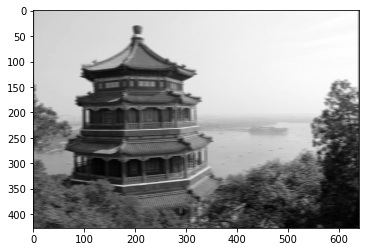

In [2]:
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg") / 255        # 중국 사원 이미지
flower = load_sample_image("flower.jpg") / 255      # 꽃 이미지
                                                    # 두 이미지 모두 컬러 이미지. 각 컬러 채널의 픽셀 강도는 0~255값을 가진 바이트 하나로 표현됨. 이를 255로 나눠 0~1사이의 실수로 바꿈.
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

# 2개의 필터 생성
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1     # 수직선 필터
filters[3, :, :, 1] = 1     # 수평선 필터

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")  # 필터를 두 이미지에 적용
                                                                    # stride는 1, padding은 제로 패딩("SAME")
                                                                    # images : 입력의 미니배치(4차원 텐서)
                                                                    # filters : 적용될 필터(4차원 텐서)
                                                                    # strides : 1 또는 4개의 원소를 갖는 1차원 배열 지정 가능. 배열 사용 시 가운데 두 개의 원소는 수직, 수평 스트라이드이고
                                                                    #           첫 번째와 마지막 원소는 1.
                                                                    # padding : "VALID" 시, 제로 패딩을 사용하지 않음.

plt.imshow(outputs[0, :, :, 1], cmap="gray")    # 첫 번째 이미지(0)의 두 번째 특성 맵(1) 표시
plt.show

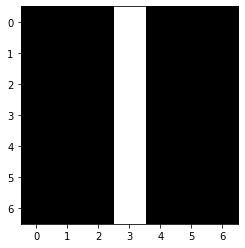

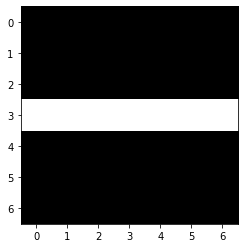

In [4]:
# 필터 형태
plt.imshow(filters[:, :, 0, 0], cmap="gray")
plt.show()
plt.imshow(filters[:, :, 0, 1], cmap="gray")
plt.show()

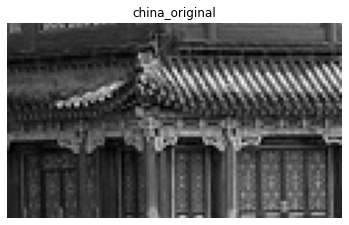

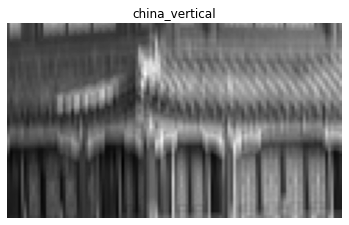

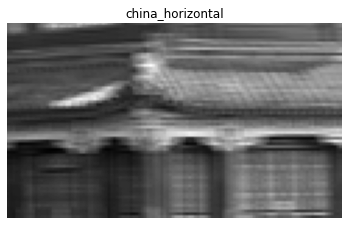

In [5]:
# 이미지의 특성 맵 출력(이미지의 일부분만 표시)
def crop(images):
    return images[150:220, 130:250]

plt.imshow(crop(images[0, :, :, 0]), cmap="gray", )
plt.title("china_original")
plt.axis("off")
plt.show()

for feature_map_index, title in enumerate(["china_vertical", "china_horizontal"]):
    plt.imshow(crop(outputs[0, :, :, feature_map_index]), cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()

> * strides로 주는 1차원 배열의 첫 번째 원소와 마지막 원소는 언젠가 배치 스트라이드, 채널 스트라이드를 지정하는 데 사용될 수 있지만 현재는 1, 1을 사용
> * padding="VALID"시, 스트라이드에 따라 입력 이미지의 아래 행, 오른쪽 열이 무시될 수 있음. 모든 뉴런의 수용장이 입력 안쪽 영역에만 놓임.
> * padding="SAME"시, 출력 크기는 (입력 뉴런 수/스트라이드) 값을 올림한 것과 같음.

* 위 코드에서는 필터를 직접 지정했지만 실제 CNN에서는 훈련 가능한 변수로 필터를 정의하므로 신경망이 가장 잘 맞는 필터를 학습할 수 있음.

In [10]:
# 3*3크기의 32개의 필터, 수직,수평 방향으로 각각 스트라이드 1, "same" 패딩을 사용하는 Conv2D 층. 출력을 위해 ReLU활성화 함수 사용.
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu")

In [14]:
# 위의 이미지에 Conv2D 적용
np.random.seed(42)
tf.random.set_seed(42)

conv = keras.layers.Conv2D(filters=2, kernel_size=7, strides=1, padding="same", activation="relu", input_shape=outputs.shape)
conv_outputs = conv(images)

In [15]:
# 층의 출력은 4차원 텐서. 각각 배치 크기(이미지 수), 높이(출력 특성맵의 높이), 너비(출력 특성맵의 너비), 채널(이미지 당 특성 맵 수).
# padding="same", strides=1이므로 출력 특성맵의 높이와 너비는 입력 이미지와 동일(427*640).
conv_outputs.shape

TensorShape([2, 427, 640, 2])

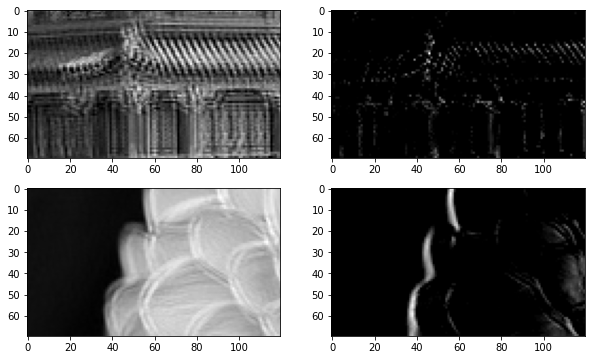

In [16]:
# 이미지 별 출력된 2개의 특성맵 출력.
plt.figure(figsize=(10, 6))

for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index*2 + feature_map_index + 1)
        plt.imshow(crop(conv_outputs[image_index, :, :, feature_map_index]), cmap="gray")
plt.show()

> * 필터가 초기에 랜덤하게 초기화되므로 랜덤한 패턴을 감지함.
> * 첫 번째 필터는 어느정도 edge를 감지한 것으로 보임

In [17]:
# 수동으로 정의한 필터도 사용할 수 있음(단, 훈련 동안 적절한 필터와 편향을 학습하므로 수동으로 지정할 필요가 거의 없음.)
conv.set_weights([filters, np.zeros(2)])
conv_outputs = conv(images)

In [18]:
conv_outputs.shape

TensorShape([2, 427, 640, 2])

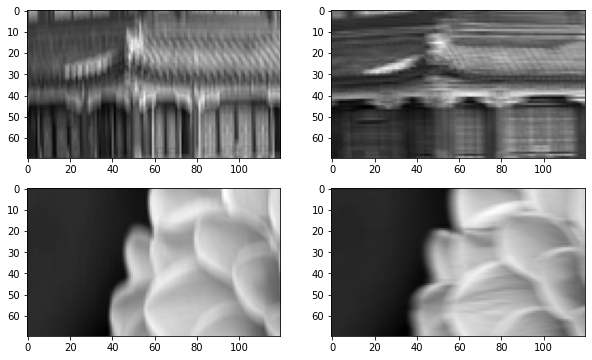

In [19]:
plt.figure(figsize=(10, 6))

for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index*2 + feature_map_index + 1)
        plt.imshow(crop(conv_outputs[image_index, :, :, feature_map_index]), cmap="gray")
plt.show()

* 합성곱 층은 많은 양의 메모리를 필요로 함.
  * 훈련하는 동안 역전파 알고리즘이 역방향 계산을 할 때 정방향에서 계산했던 모든 중간값을 필요로 하기 때문.
  * ex) 5\*5 필터, 스트라이드 1, "same" 패딩을 사용해 150\*100 크기의 특성 맵 200개를 만드는 합성곱 층이 있을 때, 입력이 150\*100 RGB 이미지라면 파라미터 수는 (5\*5\*3 + 1)\*200 = 15200개가 됨(필터는 이전 층의 채널이나 특성 맵의 전체 깊이에 적용되므로 5\*5필터, 채널 3개(RGB)를 곱한 것에 편향이 존재하므로 +1). 이는 완전 연결 층보다는 적지만, 200개의 특성 맵마다 150\*100개의 뉴런을 포함하고, 각 뉴런은 5\*5\*3=75개의 입력에 대한 가중치 합을 계산해야 하므로 약 2억 번 이상의 실수 곱셈이 존재함. 만약, 특성 맵이 32bit 부동소수로 표현된다면 12MB의 메모리를 차지하게 될 것이고, 훈련 배치가 100개의 샘플로 이루어져있다면 약 1.2GB의 메모리를 사용하게 됨.
* 추론(새로운 샘플에 대한 예측을 만듦) 시, 하나의 층이 점유하고 있는 RAM은 다른 층의 계산의 완료되자마자 해제될 수 있으므로 연속된 두 개의 층에서 필요로 하는 메모리 크기만 갖고 있으면 됨.
* 단, 훈련 시 정방향에서 계산했던 모든 값이 역방향 계산에 사용되므로 각 층에서 필요한 메모리 양의 전체 합만큼 필요.
* 메모리 부족으로 훈련리 실패한다면 미니배치 크기를 줄이거나, 스트라이드를 사용해 차원을 줄이거나, 몇개 층을 제거할 수 있음 또는 16bit 부동소수로 낮추거나 여러 장치에 CNN을 분산시킬 수 있음.

### 풀링 층

* 계산량과 메모리 사용량, (과대적합의 위험을 줄여주는) 파라미터 수를 줄이기 위해 입력 이미지의 부표본(축소본)을 만드는 층
* 합성곱 층과 마찬가지로 각 뉴런은 이전 층의 작은 사각 영역의 수용장 안에 있는 뉴런의 출력과 연결됨.
* 크기, 스트라이드, 패딩을 지정해야 하지만, 풀링 뉴런은 가중치가 없음.
  * 최대나 평균 같은 합산 함수를 사용해 입력값을 더함.
* **최대 풀링 층(max pooling layer)** : 각 수용장에서 가장 큰 입력값이 다음 층으로 전달되고 다른 값은 버려짐.
  * ex) 2\*2 풀링 커널(pooling kernel, 또는 풀링 함수)와 스트라이드는 2를 사용, 패딩은 없을 때, 수용장 내의 영역의 값이 1, 5, 3, 2라면 최댓값인 5가 다음 층으로 전달됨. 스트라이드가 2이므로 출력 이미지의 높이와 너비는 입력 이미지의 절반이 되고, 패딩을 사용하지 않았으므로 크기의 소수점 이하는 내림.
  * 최대 풀링 층은 작은 변화에도 일정 수준의 불변성을 만들어 줌.(ex. 어떤 이미지가 1픽셀 정도 이동해도 최대 풀링 층 통과 결과는 동일하게 나올 수 있음.)
  * CNN에 몇 개 층 마다 최대 풀링 층을 추가하면 전체적으로 일정 수준의 이동 불변성을 얻을 수 있음. 또한, 회전, 확대, 축소에 대해 약간의 불변성을 제공.
  * 분류 작업처럼 예측이 작은 부분에 영향을 받지 않는 경우 유용할 수 있음.
  * 단, 층은 파괴적임. 만약 2\*2 커널과 스트라이드 2를 사용하더라도 출력은 양방향으로 절반이 줄어드므로 입력값의 75%를 잃게 됨. 또한 시맨틱 분할과 같은 경우 불변성이 필요로 하지 않을 수 있음.

In [20]:
# tensorflow에서 최대 풀링 층 구현
# 2*2 커널 사용. 스트라이드의 기본값은 커널의 크기와 동일(스트라이드 2 사용). 패딩의 기본값은 "valid"(패딩 없음)
max_pool = keras.layers.MaxPool2D(pool_size=2)

cropped_images = np.array([crop(image) for image in images], dtype=np.float32)
output = max_pool(cropped_images)

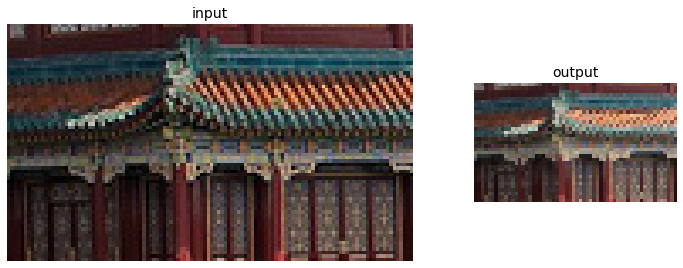

In [21]:
# from https://github.com/rickiepark/handson-ml2/blob/master/14_deep_computer_vision_with_cnns.ipynb
fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("input", fontsize=14)
ax1.imshow(cropped_images[0])
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("output", fontsize=14)
ax2.imshow(output[0])
ax2.axis("off")
plt.show()

* **평균 풀링 층(average pooling layer)** : 각 수용장 내의 값들의 평균을 계산하여 출력
  * 나머지 부분은 최대 풀링 층과 동일하게 작동
  * <code>AvgPool2D</code> 사용
  * 일반적으로는 최대 풀링 층이 성능이 더 좋아서 많이 사용함.
  * 평균 풀링 층이 일반적으로 정보 손실이 적고 특징을 희석시키지만, 최대 풀링 층은 의미 없는 특징은 제거하고 가장 큰 것만 유지함.

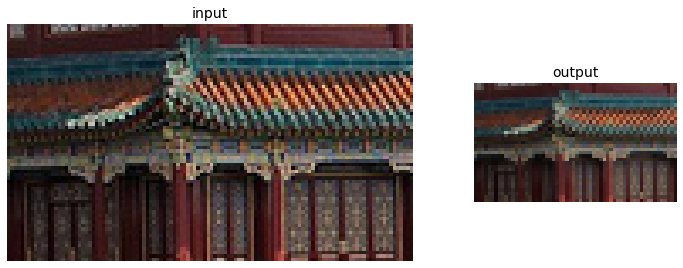

In [22]:
avg_pool = keras.layers.AvgPool2D(pool_size=2)
output2 = avg_pool(cropped_images)

fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("input", fontsize=14)
ax1.imshow(cropped_images[0])
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("output", fontsize=14)
ax2.imshow(output2[0])
ax2.axis("off")
plt.show()

* 최대 풀링과 평균 풀링은 공간 차원이 아닌, 깊이 차원(depthwise)으로 수행될 수 있음. 이를 통해 CNN이 다양한 특성에 대한 불변성을 학습할 수 있음.
  * ex) 동일 패턴이 회전된 여러 가지 필터를 학습했을 때, 깊이 방향 최대 풀링 층은 이미지의 회전에 상관없이 동일한 출력을 만듦. 그 외에도 두께, 밝기, 왜곡, 색상 등 어떤 것에 대해서도 불변성을 학습할 수 있음.
* keras에서는 제공하지 않지만 텐서플로 저수준 API를 사용할 수 있음.
  * <code>tf.nn.max_pool()</code>을 사용하고 커널 크기와 스트라이드는 4개의 원소를 가진 튜플로 지정. 튜플의 첫 3개의 값은 모두 1로 지정(배치, 높이, 너비 차원을 따라 커널 크기와 스트라이드가 1이라는 의미). 깊이 차원을 따라 원하는 커널 크기와 스트라이드 값을 튜플의 4번째 값으로 지정(입력 깊이를 나누었을 때 떨어지는 값이어야 함. 만약, 이전 층에서 20개의 특성 맵이 출력된다면 3을 넣으면 작동하지 않음.). 

In [24]:
with tf.device("/cpu:0"):
    output = tf.nn.max_pool(images, ksize=(1,1,1,3), strides=(1,1,1,3), padding="VALID")

* 이를 케라스 코델의 층으로 사용하려면 Lambda층으로 감싸거나 사용자 정의 케라스 층을 만듦.

In [25]:
depth_pool = keras.layers.Lambda(
    lambda X: tf.nn.max_pool(X, ksize=(1,1,1,3), strides=(1,1,1,3), padding="VALID")
)

In [27]:
with tf.device("/cpu:0"):
    depth_output = depth_pool(cropped_images)

In [28]:
depth_output.shape

TensorShape([2, 70, 120, 1])

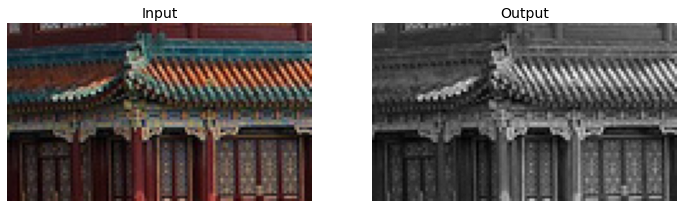

In [29]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.title("Input", fontsize=14)
plt.imshow(cropped_images[0])  # 첫 번째 이미지 그리기
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Output", fontsize=14)
plt.imshow(depth_output[0, ..., 0], cmap="gray")  # 첫 번째 이미지 출력 그리기
plt.axis("off")
plt.show()

* 전역 평균 풀링(global average pooling layer) : 각 특성 맵의 평균을 계산. 즉, 각 샘플의 특성 맵 마다 하나의 숫자를 출력하게 됨.
  * 특성 맵의 대부분의 정보를 잃게 되지만, 출력층에서는 유용할 수 있음.
  * <code>keras.layers.GlobalAvgPool2D</code> 사용

In [30]:
global_avg_pool = keras.layers.GlobalAvgPool2D()
global_avg_pool(cropped_images)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.2788777 , 0.22507192, 0.20967275],
       [0.51288515, 0.45952243, 0.33423486]], dtype=float32)>

> 이는 공간 방향(높이와 너비)을 따라 평균을 계산하는 Lambda층과 동일

In [31]:
output_global_avg2 = keras.layers.Lambda(lambda X: tf.reduce_mean(X, axis=[1, 2]))
output_global_avg2(cropped_images)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.2788777 , 0.22507192, 0.20967275],
       [0.51288515, 0.45952243, 0.33423486]], dtype=float32)>

### CNN

* 전형적인 CNN구조는 합성곱 층을 몇개 쌓고 (각각 ReLU층을 그 뒤에 놓고), 풀링 층을 쌓고, 그 다음에 또 합성곱 층(과 ReLU 층)을 몇개 더 쌓고, 그 다음 다시 풀링 층을 쌓는 식으로 되어있음.
  * 네트워크를 통과할수록 이미지는 점점 작아지지만, 합성곱 층으로 인해 더 깊어짐(즉, 더 많은 특성 맵을 가짐).
* 마지막에는 몇개의 완전 연결 층으로 구성된 일반적인 피드포워드 신경망(뉴런의 출력이 순환되지 않는 구조. 보통 완전 연결 신경망을 의미)이 추가되고, 마지막 층에서 예측을 출력(클래스 확률을 추정하기 위한 소프트맥스 층 등.)
* 합성곱 층에 너무 큰 커널을 사용하는 것은 좋지 않음.
  * ex) 5*\5 합성곱 층 대신 3\*3 커널 두 개를 쌓는 것이 파라미터와 계산량이 적고 일반적으로 더 나은 성능을 냄.
  * 단, 첫 번째 합성곱 층에서는 일반적으로 큰 크기의 커널과 2이상의 스트라이드를 사용해 너무 많은 정보를 잃지 않고 공간 방향 차원을 줄일 수 있음.

In [32]:
# CNN으로 fashion mnist 문제 풀기

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [58]:
label_tags = {
    0: 'T-Shirt', 
    1: 'Trouser', 
    2: 'Pullover', 
    3: 'Dress', 
    4: 'Coat', 
    5: 'Sandal', 
    6: 'Shirt',
    7: 'Sneaker', 
    8: 'Bag', 
    9: 'Ankle Boot'
}

In [34]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=[28, 28, 1]), # 이미지가 아주 크지 않기 때문에 64개의 큰 필터(7*7)와 스트라이드 1 사용.
                                                                                            # 이미지가 28*28크기이고, 채널이 1개이므로(흑백) input_shape=[28, 28, 1]
    keras.layers.MaxPooling2D(2),                                                           # 풀링 크기가 2인 최대 풀링 층을 추가, 공간 방향 차원을 절반으로 줄임.
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),                         # 이후, 합성곱 층 2개-최대 풀링 층 1개 구조를 반복. 이미지가 클 때는 이 구조를 더 많이 반복해야할 수도 있음.
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),                         # 필터 수는 점점 증가(64->128->256). 저수준 특성(동심원, 수평선 등)의 개수는 적지만, 이들을 연결하여 고수준 특성을
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),                         # 만들 수 있기 때문에 합리적인 구조. 보통 풀링 층 다음에 필터 개수를 두 배로 늘리는 것이 일반적인 방법(풀링층이 공간 방향 차원을 절반으로 줄이기 때문).
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),                                                                 # 두 개의 은닉층과 하나의 출력층으로 완전 연결 네트워크 구성. Dense층은 1차원 배열이 필요하므로 Flatten()층 추가
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),                                                              # 층 사이 과대적합을 줄이기 위해 50% 드롭아웃 적용.
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10]
y_pred = model.predict(X_new)

Epoch 1/10
1719/1719 [==============================] - 44s 22ms/step - loss: 0.7271 - accuracy: 0.7459 - val_loss: 0.3841 - val_accuracy: 0.8690
Epoch 2/10
1719/1719 [==============================] - 38s 22ms/step - loss: 0.4297 - accuracy: 0.8559 - val_loss: 0.3274 - val_accuracy: 0.8826
Epoch 3/10
1719/1719 [==============================] - 40s 23ms/step - loss: 0.3681 - accuracy: 0.8751 - val_loss: 0.3182 - val_accuracy: 0.8882
Epoch 4/10
1719/1719 [==============================] - 38s 22ms/step - loss: 0.3390 - accuracy: 0.8859 - val_loss: 0.3021 - val_accuracy: 0.8952
Epoch 5/10
1719/1719 [==============================] - 38s 22ms/step - loss: 0.3055 - accuracy: 0.8957 - val_loss: 0.3108 - val_accuracy: 0.8864
Epoch 6/10
1719/1719 [==============================] - 40s 23ms/step - loss: 0.2958 - accuracy: 0.8999 - val_loss: 0.2777 - val_accuracy: 0.8948
Epoch 7/10
1719/1719 [==============================] - 39s 22ms/step - loss: 0.2794 - accuracy: 0.9050 - val_loss: 0.2816 -

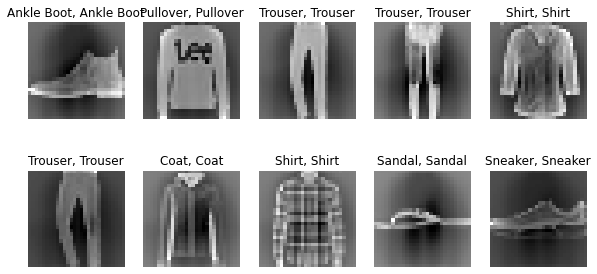

In [73]:
plt.figure(figsize=(10, 5))
for index, image in enumerate(X_new):
    label_index = y_pred[index].argmax(axis=0)
    plt.subplot(2,5,index+1)
    plt.imshow(image, cmap="gray")
    plt.title(f"{label_tags[label_index]}, {label_tags[y_test[index]]}")
    plt.axis("off")
plt.show()